# Domácí úkol


## 1. Spinograf
- **Úkol : nakreslete obrázek trajektorie bodu na spinografu pro zadané hodnoty**
    - $ R $  (poloměr větší kružnice),
    - $ r $  (poloměr menší kružnice), a
    - $ d $  (vzdálenost bodu od středu menší kružnice).
- Rozmyslete si kolik rotací musí menší kružnice udělat, aby se bod vrátil do své původní pozice. (vykreslete dráhu tak, aby byla uzavřená)
- Vyzkoušejte alespoň pro $R=10, r=3, d=1$ a $R=7, r=2, d=5$.
- Vykreslete pomocí tenké modré čáry, zvolte dostatek bodů, aby byla trajektorie plynulá (hladká).

---

### Co je to spinograf?
Jedná se o hru/výukovou pomůcku (viz. https://en.wikipedia.org/wiki/Spirograph).

Pro vysvětlení trajektorie bodu na spinografu (často označovaného jako hypotrochoida, když se menší kružnice otáčí uvnitř větší kružnice) použijeme goniometrický popis polohy bodu na kružnici v závislosti na úhlu rotace. Máme jednu větší kružnici s poloměrem  $ R $  a jednu menší kružnici s poloměrem  $ r $ , a chceme trasovat dráhu bodu, který je od středu menší kružnice vzdálen o vzdálenost  $ d $ .


### Poloha středu menší kružnice

Střed menší kružnice se otáčí uvnitř větší kružnice. Poloha středu menší kružnice v závislosti na úhlu  $ \theta $  je dána parametrickými rovnicemi v kartézských souřadnicích:

-  $ X = (R - r)  \cos(\theta) $ 
-  $ Y = (R - r)  \sin(\theta) $ 

kde  $ \theta $  je úhel rotace středu menší kružnice v radiánech.

### Otočení menší kružnice

Menší kružnice se otočí (valí se po větší kružnici). Úhel, o který se menší kružnice otočila ve svém vlastním středu vzhledem k počátečnímu bodu, je dán délkou oblouku, který urazila:
$$ \theta R $$

pokud chceme tento oblouk vyjádřit vzhledem k úhlu otočení v radiánech, o který se otočila menší kružnice ve svém středu,  převádíme zpětně z obvodu na úhel:
$$ \theta \frac{ R}{r} $$
poslední dvě důležitá pozotování jsou:
- malá kružnice se otočí negativně (tedy úhel je záporný)
- malá kružnice se otočí zároveň se svým středem, tedy k úhlu otočení musíme přičíst úhel $\theta$

Celkově máme:

$$ \phi = \theta - \theta \frac{R}{r} = - \theta \frac{R-r}{r} $$


### Pozice bodu na spinografu

Nakonec, sloučíme pozici středu a relativní pozici bodu ve vzdálenosti $d$ od středu menší kružnice

-  $ x = X + d \cos(\phi) = (R - r) \cos(\theta) + d \cos(- \theta \frac{R-r}{r})$ 
-  $ y = X + d \sin(\phi) = (R - r) \sin(\theta) + d \sin(- \theta \frac{R-r}{r})$ 

Pokud použijeme vlastnosti (sudost/lichost) gonimetricých funkcí, můžeme tyto rovnice zjednodušit na:

$$ x = (R - r) \cos(\theta) + d \cos(\theta \frac{R-r}{r})$$
$$ y = (R - r) \sin(\theta) - d \sin(\theta \frac{R-r}{r})$$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# lcm that will work with floats too (2 dec. points precision)
def my_lcm(a, b):
    int_a = int(a * 100)
    int_b = int(b * 100)
    return np.lcm(int_a, int_b) / 100

# spinograph implementation
def spinograph(R, r, d):
    rotations = my_lcm(R, r) / R
    θ = np.linspace(0, 2 * np.pi * rotations, 1000)
    x = (R - r) * np.cos(θ) + d * np.cos(θ * (R - r) / r)
    y = (R - r) * np.sin(θ) - d * np.sin(θ * (R - r) / r)
    
    fig = plt.figure(figsize=(5, 5))
    plt.plot(x, y, color="blue", lw=1)
    plt.title(f"{R = }, {r = }, {d = }")
    plt.show()

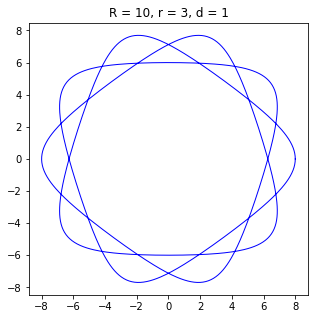

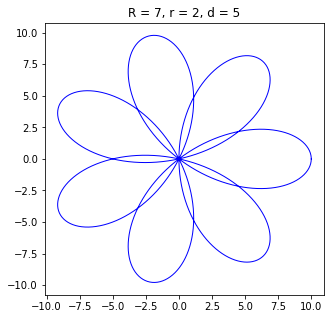

In [3]:
# testing
spinograph(10, 3, 1)
spinograph(7, 2, 5)

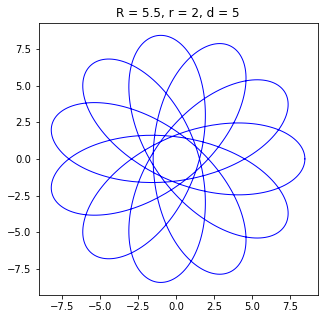

In [4]:
spinograph(5.5, 2, 5)

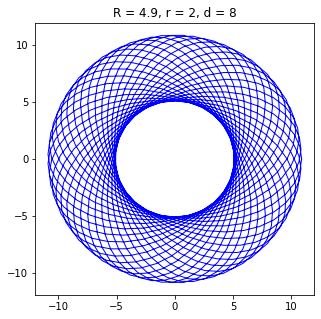

In [5]:
spinograph(4.9, 2, 8)

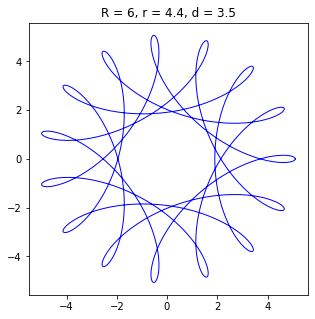

In [6]:
spinograph(6, 4.4, 3.5)

# 2. Prvočíselná spirála


**Část 1.: Vykreslení "slunečnicových bodů"**

- Vykreslete tzv. "slunečnicové body". Tedy prvních `N` takových bodů.
- Vykreslete je tak aby byl vzor dobře vidět (zvolte vhodné velikosti bodů)

##### Co jsou to slunečnicové body?
Poloměr $ r $ a úhel $ \theta $ pro každý bod (číslované přirozenými čísly: $n=1,...,N$) jsou určeny následovně:

1. Zlatý úhel $ \phi $ je dán vztahem:
$$
\phi = \pi \cdot (3 - \sqrt{5})
$$

2. Poloměr $ r $ je odvozen z indexu bodu $ n $ jako:
$$
r = \sqrt{n}
$$

3. Úhel $ \theta $ pro bod $ n $ je vypočítán jako:
$$
\theta = n \cdot \phi
$$

Každý bod je poté umístěn pomocí kartézských souřadnic $(x, y)$, které jsou vypočítány pomocí:
$$
x = r \cdot \cos(\theta)
$$
$$
y = r \cdot \sin(\theta)
$$

**Část 2.: Vykreslení prvočíselné spirály**
- Vykreslete prvočíselnou spirálu pro prvních `N` prvočísel.
- Jedná se o stejný vzor jako v případě "slunečnicových bodů", ale tentokrát vykreslíme pouze body, které odpovídají prvočíslům.


In [7]:
# part 1 implementation
def sunflower_points(n):
    N = np.arange(1, n + 1)
    ϕ = np.pi * (3 - np.sqrt(5))
    r = np.sqrt(N)
    θ = N * ϕ  

    x = r * np.cos(θ)
    y = r * np.sin(θ)

    marker_sizes = np.linspace(10, 30, len(x))
    colors = np.linspace(0, 1, len(x))
    
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(x, y, s=marker_sizes, c=colors, cmap="Wistia", edgecolors="black", lw=0.7)
    plt.show()

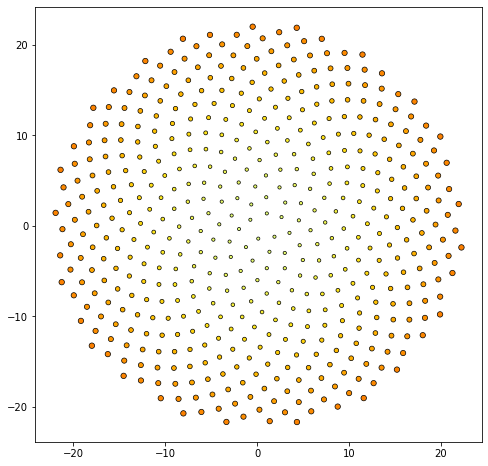

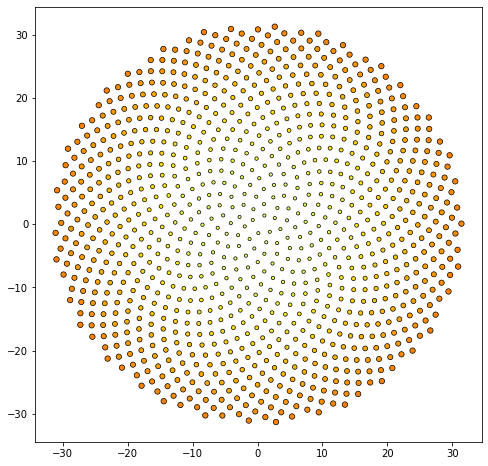

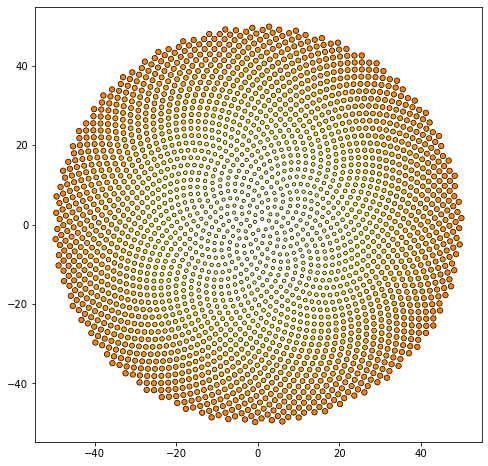

In [8]:
# testing
sunflower_points(500)
sunflower_points(1000)
sunflower_points(2500)

In [9]:
# part 2 implementation
import sympy

def sunflower_points_prime(n):
    N = []
    i = 2
    while len(N) < n:
        if (sympy.isprime(i)):
            N.append(i)
        i += 1

    ϕ = np.pi * (3 - np.sqrt(5))
    r = np.sqrt(N)
    θ = [i * ϕ for i in N] 

    x = r * np.cos(θ)
    y = r * np.sin(θ)

    marker_sizes = np.linspace(10, 30, len(x))
    colors = np.linspace(0, 1, len(x))
    
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(x, y, s=marker_sizes, c=colors, cmap="Wistia", edgecolors="black", lw=0.7)
    plt.show()

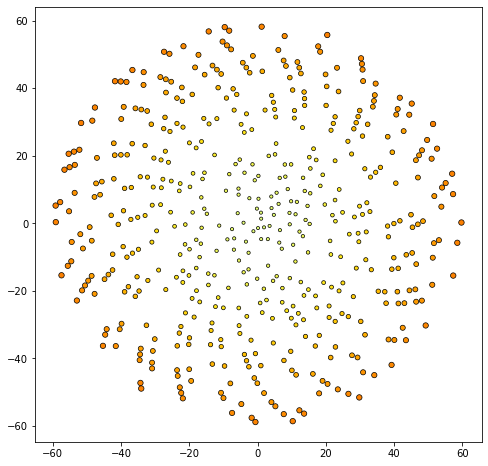

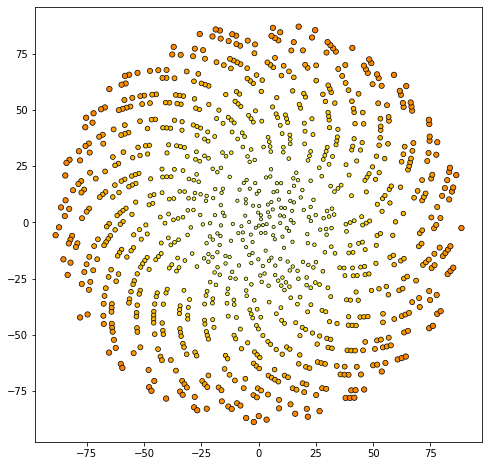

In [10]:
# testing
sunflower_points_prime(500)
sunflower_points_prime(1000)

# Bonusové úkoly
1. Modifikujte spinograf tak, aby menší kružnice:
    - se otáčela po vnější straně větší kružnice
    - se otáčela po rovnostraném n-úhelníku (trojúhelník, čtverec, šestiúhelník, ...)

In [11]:
# spinograph outer part implementation
def spinograph_outer(R, r, d):
    rotations = my_lcm(R, r) / R
    θ = np.linspace(0, 2 * np.pi * rotations, 1000)
    x = (R + r) * np.cos(θ) - d * np.cos(θ * (R + r) / r)
    y = (R + r) * np.sin(θ) - d * np.sin(θ * (R + r) / r)
    
    fig = plt.figure(figsize=(5, 5))
    plt.plot(x, y, color="blue", lw=1)
    plt.title(f"{R = }, {r = }, {d = }")
    plt.show()

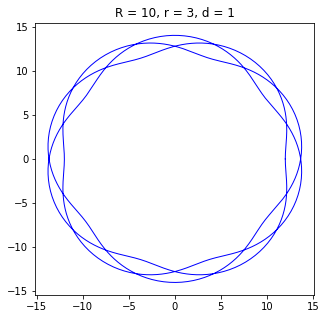

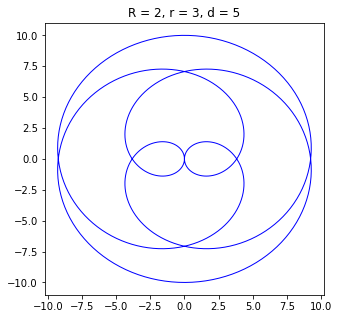

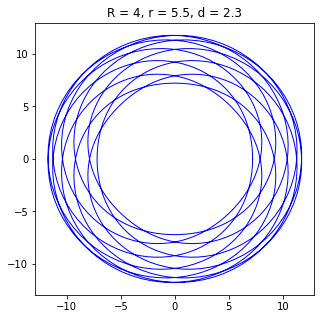

In [12]:
# testing
spinograph_outer(10, 3, 1)
spinograph_outer(2, 3, 5)
spinograph_outer(4, 5.5, 2.3)

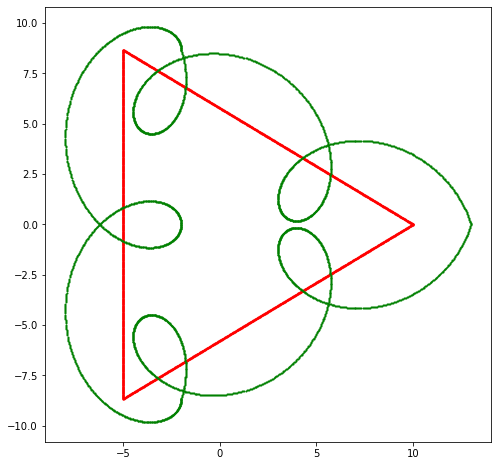

In [13]:
# spinograph with polygon implementation
def spinograph_poly(n, a, r, d):
    """
    n ... number of vertices
    a ... polygon's side length
    r ... circle radius
    d ... distance from center
    """
    angles = np.linspace(0, 2*np.pi, n + 1)
    x = a * np.cos(angles)
    y = a * np.sin(angles)
    
    # polygon vertices on circumference
    x_poly = [np.linspace(x[i], x[(i + 1)], 1000) for i in range(n)]
    y_poly = [np.linspace(y[i], y[(i + 1)], 1000) for i in range(n)]

    θ = np.linspace(0, 2 * np.pi * r, 1000)

    #x_circle = x_poly + r * np.cos(theta) - d * np.cos(theta * r)
    #y_circle = y_poly + r * np.sin(theta) - d * np.sin(theta * r)

    x_circle = x_poly + d * np.cos(θ)
    y_circle = y_poly + d * np.sin(θ)

    plt.figure(figsize=(8, 8))
    plt.scatter(x_poly, y_poly, color='red', s=1)
    plt.scatter(x_circle, y_circle, color="green", s=1)
    plt.show()

spinograph_poly(3, 10, 2, 3)
